# Examen número 1: Métodos computacionales para físicos.

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia




1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  


a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```


b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.

Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

# **Primer punto**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import optimize
import sympy as sp

In [ ]:
# Datos iniciales

g= 9.8
k= 0.148
s0= 900
m= 0.25

params=(g,k,s0,m)

In [ ]:
def caida(t,params):

  s= s0-(m*g/k)*t+ (m**2*g/k**2)*(1-np.exp(-k*t/m))

  return s

In [ ]:
t= np.linspace(0,10,100)

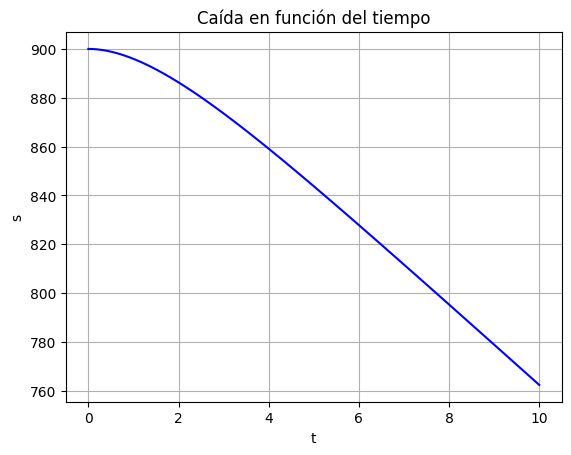

In [ ]:
plt.plot(t,caida(t,params),color="blue")
plt.xlabel("t")
plt.ylabel("s")
plt.title("Caída en función del tiempo")
plt.grid()

In [ ]:
s= lambda t: s0-(m*g/k)*t+ (m**2*g/k**2)*(1-np.exp(-k*t/m))
s_diff= lambda t: -g*m/k+ k/m*(np.exp(-k*t/m))

In [ ]:
secante= optimize.newton(s,2)
secante

56.0565361279647

In [ ]:
newton= optimize.newton(s,2,s_diff)
newton

56.05653612796469

In [ ]:
punto_fijo= optimize.fixed_point(s,2)
punto_fijo

array(52.86316917)

In [ ]:
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')


f = lambda t: s0-m*g*t/k+m**2*g/k**2 # derivada hasta el término m**2*g/k**2

# derivada del término restante

#k/m*np.exp(-k*t/m)

# Primera derivada
derivada=sp.diff(f(t), t, 1)
derivada

-g*m/k

In [ ]:
masas= np.linspace(0.25,1,10)
masas

array([0.25      , 0.33333333, 0.41666667, 0.5       , 0.58333333,
       0.66666667, 0.75      , 0.83333333, 0.91666667, 1.        ])

In [ ]:
s_nuevo= lambda t,params: s0-(m*g/k)*t+ (m**2*g/k**2)*(1-np.exp(-k*t/m))

for i in masas:
  params1 =(g,k,s0,i)
  s_nuevo= lambda t,params1: s0-(m*g/k)*t+ (m**2*g/k**2)*(1-np.exp(-k*t/m))
  tiempo_caida= optimize.newton(s_nuevo,2,args=params1)




TypeError: ignored

# **Segundo punto**

In [ ]:
url="https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv"

In [ ]:
df= pd.read_csv(url)
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
columnas=["Date/Time","Temp_C","Dew Point ","Temp_C","Rel Hum_%	","Wind Speed_km/h	","Visibility_km	","Press_kPa","Weather"]
columnas

['Date/Time',
 'Temp_C',
 'Dew Point ',
 'Temp_C',
 'Rel Hum_%\t',
 'Wind Speed_km/h\t',
 'Visibility_km\t',
 'Press_kPa',
 'Weather']

In [ ]:
df["Weather"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8784 entries, 0 to 8783
Series name: Weather
Non-Null Count  Dtype 
--------------  ----- 
8784 non-null   object
dtypes: object(1)
memory usage: 68.8+ KB


In [ ]:
# Una sola característica

unicos= df.loc[(df["Weather"]=="Snow")].copy()
unicos.reset_index()

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time
0,55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow,2012-01-03 07:00:00
1,84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow,2012-01-04 12:00:00
2,86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow,2012-01-04 14:00:00
3,87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow,2012-01-04 15:00:00
4,88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow,2012-01-04 16:00:00
...,...,...,...,...,...,...,...,...,...,...
385,8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31 19:00:00
386,8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31 20:00:00
387,8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31 21:00:00
388,8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,2012-12-31 22:00:00


In [ ]:
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M') # cambiar tiempo

In [ ]:
# Filtro para el clima

filtro= df.loc[(df["Weather"]=="Cloudy")].copy()
df1=filtro.reset_index()
df1

,index,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time
0,17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,2012-01-01 17:00:00
1,20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,2012-01-01 20:00:00
2,21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,2012-01-01 21:00:00
3,23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,2012-01-01 23:00:00
4,25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy,2012-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...
1723,8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy,2012-12-31 01:00:00
1724,8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,2012-12-31 02:00:00
1725,8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,2012-12-31 04:00:00
1726,8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy,2012-12-31 05:00:00


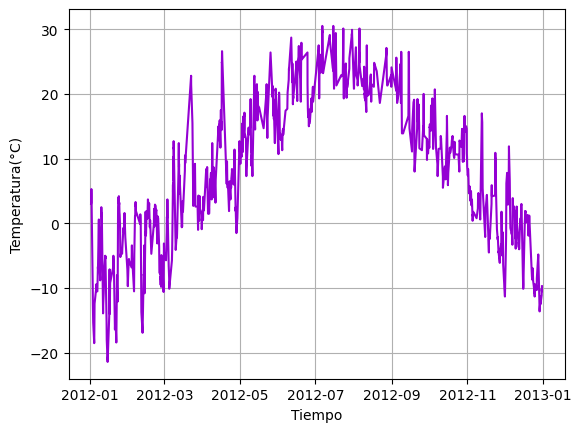

In [ ]:
plt.plot(df1["Time"],df1["Temp_C"],color="darkviolet")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura(°C)")
plt.grid()

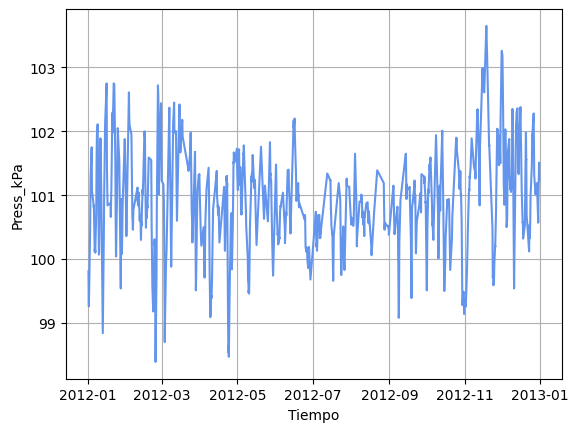

In [ ]:
plt.plot(df1["Time"],df1["Press_kPa"],color="cornflowerblue")
plt.xlabel("Tiempo")
plt.ylabel("Press_kPa")
plt.grid()